# Coursera Machine Learning by Andrew Ng

## Programming Exercise 2: Logistic Regression

본 과제는 매트랩으로 진행되는 과제이나, 매트랩에 익숙하지 않은 관계로 파이썬으로 구현하였다.

과제 설명 파일에 제시된 부분을 구현하였다. 과제 설명과 매트랩 파일의 힌트를 참고하였다.

**보고서 대신 코드와 설명, 주석을 함께 작성한 해당 파일을 첨부드립니다.**

## Introduction
두개의 다른 데이터셋을 가지고 로지스틱 회귀를 할 것이다.

구현해야 할 파일은 `plotData.m`, `sigmoid.m`, `costFunction.m`, `predict.m`, `costFunctionReg.m`

## 1. Logistic Regression
이 부분에서는 로지스틱 회귀 모델을 구현한다. 모델은 학생을 대학에 입학을 승인할 것인지에 관한 모델임.

너는 대학 본부의 관리자이다. 너는 결정하고 싶다 각 지원자의 승인 자격을 그들의 두 시험의 결과를 바탕으로. 너는 이전 지원자들로부터 데이터를 갖고 있다. 이 데이터를 로지스틱 회귀의 트레이닝 셋으로 사용할 것이다. 각각의 트레이닝 example에는 두 시험으로부터 얻은 지원자의 점수와 입할 결정이 있다.

네가 할 일은 **classification model**을 생성하는 것이다. 지원자들의 입학 가능성을 측정하기 위해.

**요약**
* training dataset : 옛날 지원자들의 시험 점수 및 입학 승인 여부
* 해야할 것 : 새로운 지원자들의 입학 가능성을 측정하기 위한 분류 모델 생성(Logistic regression)

### 1.1 Visualizing the data
plotData.m의 빈 부분을 구현해라. 데이터는 ex2.m을 로드해서 사용.

합격자(admitted)는 검정색 '+' 로, 불합격자는 노란색 'o'로 마킹(plotted)

힌트 코드
```
pos = find(y==1); neg = find(y==0);

plot(X(pos, 1), X(pos, 2), 'K+', 'LineWidth', 2, ... 'MarkerSize', 7);
plot(X(neg, 1), X(neg, 2), 'k0', 'MarkerFaceColor', 'y', ... 'MarkerSize', 7);
```

In [100]:
import matplotlib.pyplot as plt
import numpy as np

In [101]:
data = np.loadtxt('ex2data1.txt', delimiter=',')
print(data[0])

[34.62365962 78.02469282  0.        ]


In [102]:
# 데이터의 첫 번째와 두 번째 컬럼은 시험 점수, 마지막 컬럼은 Label(합격(1) 불합격(0))
data = np.array(data) # 데이터의 행렬 변환

X = data[:, 0:2] #Feature
y = data[:, 2] # Label

print(X[0])
print(y)
print(X.shape)
print(y.shape)

[34.62365962 78.02469282]
[0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1.]
(100, 2)
(100,)


In [103]:
def plotData(X, y):
    # 합격자와 불합격자 인덱스 찾기
    pos = np.where(y==1.)
    neg = np.where(y==0.)
    
    plt.plot(X[pos, 0], X[pos, 1], 'k+', color='blue', label='Admitted')
    plt.plot(X[neg, 0], X[neg, 1], 'ko', color='y', label='Not admitted')
    
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')

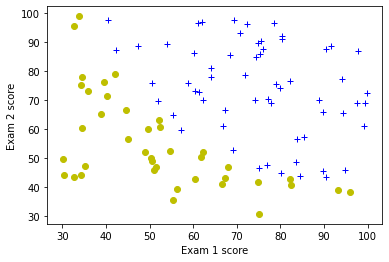

In [104]:
plotData(X, y)

### 1.2 Implement
#### 1.2.1 Sigmoid function
* logistic regression의 hypotesis
    * <img src="./assets/1.png" alt="hypothesis"></img>
* 여기서 함수 g는 sigmoid function이다. sigmoid function은 다음과 같음.
    * <img src="./assets/2.png" alt="sigmoid"></img>
* `sigmoid.m` 내의 함수를 구현해라
    * 아주 큰 양의 값에 대해서 sigmoid는 1에 가깝고, 아주 큰 음의 값에 대해 sigmoid는 0에 가까움.
    * sigmoid(0)은 정확히 0.5

In [105]:
def sigmoid(z):
    g = 1 / (1+np.exp(-z))
    return g

In [106]:
print('sigmoid test : sigmoid(50) = {}, sigmoid(-50) = {}, sigmoid(0) = {}'.format(sigmoid(50), sigmoid(-50), sigmoid(0)))

sigmoid test : sigmoid(50) = 1.0, sigmoid(-50) = 1.928749847963918e-22, sigmoid(0) = 0.5


#### 1.2.1 cost function
* cost function은 다음과 같다.
    * <img src="./assets/3.png" alt="cost function"></img>
* 이를 바탕으로 한 gradient descent는 다음과 같다.
    * <img src="./assets/4.png" alt="gradient"></img>
* logistic regression에 대한 cost function과 gradient 구현.
    * `costFunction.m` 내의 코드를 완성해라
    * cost와 gradient를 반환할 것
    * ex2.m은 초기 파라미터 theta를 사용하여 costFunction을 호출한다.
    * **cost는 약 0.693이어야 한다.**

In [107]:
m, n = X.shape
print(m, n)

100 2


In [108]:
# 절편 부분을 추가
print(X.shape)
print(X[0])

X_ = np.zeros((m, 3))
X_[:, -1] = np.ones(m) #절편 추가
X_[:, 0:2] = data[:, 0:2] #Feature data
print(X_.shape)
print(X_[0])

# 파라미터 초기화
init_theta = np.zeros(n+1)
print(init_theta)

(100, 2)
[34.62365962 78.02469282]
(100, 3)
[34.62365962 78.02469282  1.        ]
[0. 0. 0.]


In [109]:
def costFunction(theta, X, y):
    m, n = X.shape
    J=0
    grad = np.zeros(np.size(theta))
    
    hypothesis = sigmoid(X.dot(theta))
    J = (1/m) * sum(-y*np.log(hypothesis) - (1-y)*np.log(1-hypothesis))
    grad = (1/m) * (hypothesis-y).T.dot(X)
    
    return J, grad

In [110]:
cost, grad = costFunction(init_theta, X_, y)
print('cost: ', cost)
print('grad: ', grad)

cost:  0.693147180559946
grad:  [-12.00921659 -11.26284221  -0.1       ]


#### 1.2.3 Learning parameters using `fminunc`
이전 과제(linear regression)에서, 너는 그래디언트 디센트를 통해 선형 회귀의 최적의 파라미터를 찾았다. 너는 cost function을 쓰고 그것의 gradient를 계산하고, 단계적으로 gradient descent를 수행했다.

이번에는, gradient descent를 단계적으로 수행하는 대신 너는 Octave/MATLAB의 내장함수 `fminunc`를 사용할 것이다.
Octave/MATLAB의 fminunc는 최적의 solver이다 uconstrained function의 최소값을 찾을 때. 로지스틱 회귀에 있어, 너는 cost functoin J(theta)를 파라미터 theta를 가지고 최적화하는 것을 바랄 것이다.

정확하게, 너는 `fminunc`를 사용해라

* 우리가 최적화하려는 것은 파라미터의 초기값이다.
* training set과 특별한 theta값을 주었을 때, 함수는 데이터셋 (X,y)의 theta에 대한 logistic regression cost와 gradient를 계산한다. 

우리는 이미 `ex2.m`에 `fminunc`를 호출하는 코드를 작성했다.
```
# Set options for fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);

# Run
[theta, cost] = ... fminunc(@(t)(costFunction(t, X, y)), init_theta, options);
```

위 코드 snippet 설명
* fminunc와 함께 사용될 옵션 정의 -> GradObj 옵션을 on으로 설정하였다. 
    * 이것은 fminunc에게 우리의 함수가 cost, gradient를 둘 다 반환함을 알려줌.
    * 이것은 fminunc에게 gradient를 사용함을 허락한다 이 함수를 최소화할 때
* 우리는 MaxIter를 400으로 설정하였다.
* 네가 costFunction을 제대로 구현했다면, fminunc는 올바른 최적 파라미터로 수렴하고 cost와 theta의 최종값을 반환함.

fminunc이 완성되면, ex2.m은 costFunction 함수를 최ㅏ적의 theta로 호출할 것이다. **cost가 약 0.203이어야 한다.**

최종 theta값은 traning data의 decision boundary를 plot하는 데 사용된다. `plotDecisionBoundary.m` 파일을 완성해라

In [111]:
# ex2.m의 part3: fmiunc를 사용해서 최적의 theta 파라미터를 찾는 부분
# 우선 fminunc 대신 minimize 기능을 제공하는 scipy 라이브러리를 임포트함.
from scipy.optimize import minimize

`scipy.optimize`는 다음 문제를 풀 수 있다.

* Local optimization : `minimize`
* Global optimizatoin : `bashinghopping`, `differential_evolution`
* Least-squares minimization, curve fitting : `least_squares`, `curve_fit`
* Scalar univariate function의 최소화 또는 해 찾기 : `minimizer_scaler`, `root_scaler`
* Multivariate equation system의 해 찾기 : `root`
* Linear Programming : `linprog`

Local optimizatoin

`scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)`
* `fun`, `x0`: 목적함수, 초기값
* `method` : 사용할 알고리즘(solver)을 나타내는 문자열로, Nelder-Mead, Powell, CG, BFGS, trust-ncg 등
* `jac`, `hess`, `hessp`: 목적함수의 자코비언, 헤시안, 헤싱ㄴ과 임의 벡터의 곱

In [112]:
# Set options for fminunc 부분
Fminunc_cost = lambda t: costFunction(t, X_, y)[0]
Fminunc_grad = lambda t: costFunction(t, X_, y)[1]

In [113]:
# fmiunc를 실행하면 theta와 cost를 반환
fminunc = minimize(Fminunc_cost, init_theta, method='TNC', jac=Fminunc_grad)

In [114]:
cost = fminunc.fun
theta = fminunc.x

print('cost: ', cost)
print('theta: ', theta)

cost:  0.203497701589475
theta:  [  0.20623159   0.20147148 -25.1613185 ]


In [127]:
# 아직 미완성
def mapFeature(x1, x2):
    degree = 6
    m = np.size(x1)
    out = np.ones(m)
    
    res = []
    res.append(out)
    
    for i in np.arange(1, degree+1):
        for j in np.arange(0, i+1):
            output = (x1**(i-j)) * (x2**j)
            res.append(output)
    
    return np.array(res).T

In [159]:
# 아래 부분은 매트랩 코드를 그대로 따 왔음.
# 아래 오류를 해결하고 해당 코드를 완성해야 desicion boundary를 그릴 수 있다.
print(X.shape)
print(np.size(X,0))
def plotDecisionBoundary(theta, X_, y):
    plotData(X_[:, 0:2], y)
    
    if np.size(X_, 0) <=3:
        # line을 그리기 위해 두개의 점을 선택한다.
        plot_x = np.array([np.min(X_[:,0])-2, np.max(X[:,0]+2)])
        # decision boundary line 계산
        plot_y = (-1/theta[1]) * (theta[0]*plot_x+theta[0])
        
        plot(plot_x, plot_y)
        plt.axis([30,100,30,100])
        
    else:
        #grid range 설정
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((np.size(u), np.size(v)))
        
        #evaluate z
        for i in np.arange(np.size(u)):
            for j in np.arange(np.size(v)):
                z[i,j] = np.sum(mapFeature(u[i],v[j]) * theta)
        z = z.T
        plt.contour(u,v,z)

(100, 2)
100


ValueError: operands could not be broadcast together with shapes (28,) (3,) 

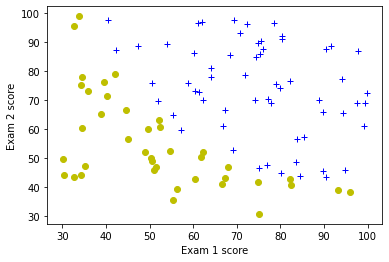

In [129]:
plotDecisionBoundary(theta, X_, y)

#### 1.2.4 Evaluationg logistic regression
파라미터 학습 후에, 너는 모델을 학생이 승인될지 아닐지 예측하는 데 쓸 수 있다. 어떤 학생이 exam1에서 45점을 맞고 exam2에서 85점을 맞았다면, 너는 그의 승인 가능성을 0.776으로 예측할 수 있다.

파라미터를 평가하기 위한 또 다른 방법은 모델이 트레이닝 셋에 있어 얼마나 예측을 잘 하는지 보는 것이다.

이 부분에서, 너의 일은 `predict.m` 코드를 완성하는 것이다.

In [140]:
def predict(theta, X):
    m = X.shape[0] #training example
    print(m)
    
    p = np.zeros(m)
    p = sigmoid(X.dot(theta)) >= 0.5
    
    return p

In [144]:
#exam1점수 45점, exam2 점수 85점
prob = sigmoid(np.sum(np.array([45,85,1])*theta))
print("prediction: ", prob)

p = predict(theta, X_)
print("accuracy: {:f}".format(np.mean((p==y)*100)))

prediction:  0.7762906215301875
100
accuracy: 89.000000


## 2. Regularized logistic regression

### 2.1 Visualizing the data

Text(0, 0.5, 'Microchip test2')

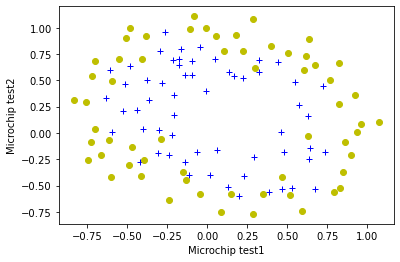

In [148]:
data_2 = np.loadtxt('ex2data2.txt', delimiter=',')
X_2 = data_2[:, 0:2]
y_2 = data_2[:,2]

plotData(X_2, y_2)

plt.xlabel('Microchip test1')
plt.ylabel('Microchip test2')

### 2.2 Feature mapping
* 데이터는 28차원 벡터로 변환된다.
* overfitting에 민감해진다.
* decision boundary를 그리기 위해 위해서 구현

### 2.3 Cost function and gradient


In [157]:
def costFunctionReg(theta, X, y, lambda_):
    m, n = X.shape
    J=0
    grad = np.zeros(np.size(theta))
    
    sum_theta_square = np.sum(theta[:2]**2)
    
    X_theta = X.dot(theta)
    hypo = sigmoid(X_theta)
    
    J = 1/m * np.sum(-y * np.log(hypo) - (1 - y) * np.log(1 - hypo)) + lambda_ / (2 * m) * sum_theta_square
    
    delta = 1/m * (hypo - y).T.dot(X)
    
    temp = theta
    temp[0] = 0
    regular = (lambda_ / m) * temp
    grad = delta+regular
    
    return J, grad

In [158]:
X_reg = mapFeature(X_2[:,0], X_2[:,1])
initial_theta = np.zeros(X_reg.shape[1])
lambda_ = 1
costReg, gradReg = costFunctionReg(initial_theta, X_reg, y_2, lambda_)
print('cost: ', costReg)

cost:  0.6931471805599454


In [168]:
# lambda값이 달라질 때 regulazation이 decision boundary에 어떤 영향을 미치는지 테스트
# lambda를 0,1,10,100으로 시도한다.
for i in range(0,4):
    if i==0:
        lambda_ =0
    elif i==1:
        lambda_=1
    elif i==2:
        lambda_=10
    else:
        lambda_=100
    cost_fmin = lambda t: costFunctionReg(t, X_reg, y_2, lambda_)[0]
    grad_fmin = lambda t: costFunctionReg(t, X_reg, y_2, lambda_)[1]

    result = minimize(cost_fmin, initial_theta, method='CG', jac=grad_fmin, options={'maxiter': 400})

    cost_reg = result.fun
    theta_reg = result.x

    print("cost: ", cost_reg)
    print("theta: ", theta_reg)
    print('\n')

cost:  0.2816210244584418
theta:  [  2.49704946  -1.55719142   2.28740219  -6.23103834  -8.49733204
   8.66146301   6.12468213  19.82809149  30.90720312   2.49987045
  23.6266917    1.82034452 -20.96940271  -5.31402605 -38.50358798
   6.1691288   -6.39469692   3.5392413  -15.64354039 -25.43240553
  16.50068057 -54.72439351 -28.764054    -6.55959057  24.32479366
 -47.25117324 -32.69698864   0.55685308]


cost:  0.47065301595504705
theta:  [ 1.2706303   0.61835686  1.18554205 -2.01475531 -0.90241705 -1.42902931
  0.1307864  -0.37330384 -0.37093247 -0.16449341 -1.46279129 -0.05738351
 -0.62372041 -0.27298634 -1.20140885 -0.23788753 -0.21293013 -0.05285055
 -0.27849728 -0.30235864 -0.46073064 -1.05001353  0.02187087 -0.29693764
  0.01134374 -0.33133197 -0.14518633 -0.94195211]


cost:  0.6205195505522866
theta:  [ 3.19220001e-01  1.39244465e-02  1.66298577e-01 -4.46975028e-01
 -1.09280280e-01 -2.78636591e-01 -6.12844367e-02 -5.97780805e-02
 -6.11850048e-02 -1.09129238e-01 -3.37999639e-01 -